In [1]:
!pip install deeplake tensorflow


In [2]:
import deeplake

# Load the FG-NET dataset
ds = deeplake.load("hub://activeloop/fgnet")

# Print available tensors
print(ds.tensors)


/

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fgnet



|

hub://activeloop/fgnet loaded successfully.

{'images': Tensor(key='images'), 'keypoints': Tensor(key='keypoints'), 'ages': Tensor(key='ages'), 'image_ids': Tensor(key='image_ids')}


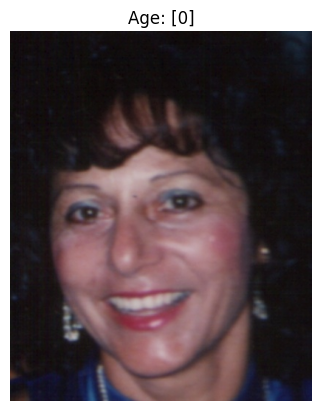

In [4]:
import matplotlib.pyplot as plt

# View the first image and its corresponding age label
sample_image = ds['images'][0].numpy()
age_label = ds['ages'][0].numpy()

plt.imshow(sample_image)
plt.title(f"Age: {age_label}")
plt.axis('off')
plt.show()


\

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fgnet



/

hub://activeloop/fgnet loaded successfully.



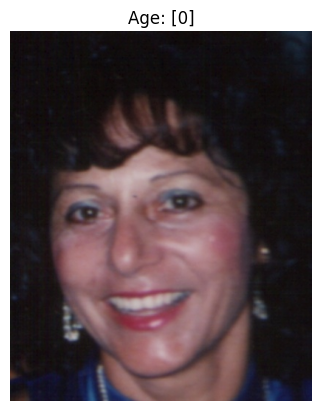

c:\Users\DEEBYTE COMPUTERS\AppData\Local\Programs\Python\Python312\Lib\site-packages\deeplake\core\tensor.py:719: UserWarning: Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds.tensor[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead.
  warnings.warn(


Batch of images shape: (32, 128, 128, 3)
Batch of labels shape: (32,)
Epoch 1/10


c:\Users\DEEBYTE COMPUTERS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


     26/Unknown 89s 3s/step - loss: 330.1798 - mae: 14.3416

c:\Users\DEEBYTE COMPUTERS\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


26/26 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step - loss: 331.8457 - mae: 14.3796 - val_loss: 442.3035 - val_mae: 16.5387
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - loss: 281.3698 - mae: 13.9246 - val_loss: 442.0114 - val_mae: 17.5298
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - loss: 309.4225 - mae: 14.8751 - val_loss: 442.7365 - val_mae: 17.5321
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - loss: 304.1679 - mae: 14.7329 - val_loss: 445.4196 - val_mae: 17.6369
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - loss: 308.5667 - mae: 14.8390 - val_loss: 438.7404 - val_mae: 17.2788
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - loss: 288.2394 - mae: 14.3188 - val_loss: 437.8611 - val_mae: 17.3070
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - loss: 293.8817 - mae: 14.4339 - val_loss: 438.8646 - val_mae: 17.4246
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - loss: 294.8535 - mae: 14.4812 - val_loss: 424.7256 - val_mae: 16.8671
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━

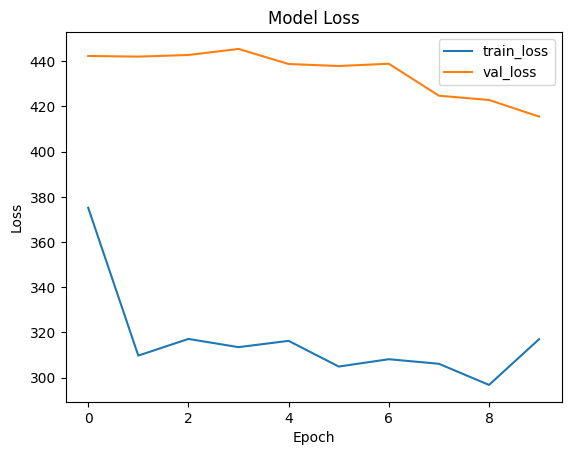

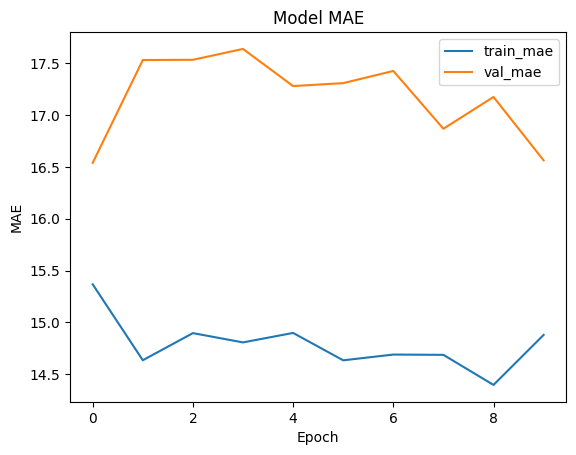

In [5]:
# Install required packages
!pip install deeplake tensorflow

import deeplake
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the FG-NET dataset
ds = deeplake.load("hub://activeloop/fgnet")

# View the first image and its corresponding age label
sample_image = ds['images'][0].numpy()
age_label = ds['ages'][0].numpy()

plt.imshow(sample_image)
plt.title(f"Age: {age_label}")
plt.axis('off')
plt.show()

# Preprocessing function to resize images and normalize them
def preprocess_image(image):
    image = tf.image.resize(image, (128, 128))  # Resize images to 128x128
    if image.shape[-1] == 1:  # Check if the image is grayscale
        image = tf.image.grayscale_to_rgb(image)  # Convert grayscale to RGB
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image

# Generator function to yield images and labels
def data_generator():
    for i in range(len(ds['images'])):
        image = ds['images'][i].numpy()  # Load the image
        label = ds['ages'][i].numpy()     # Load the corresponding age
        image = preprocess_image(image)    # Preprocess the image
        yield image, label.item()          # Use label.item() to get a scalar value

# Convert images and age labels to TensorFlow dataset
X = tf.data.Dataset.from_generator(data_generator, output_signature=(
    tf.TensorSpec(shape=(128, 128, 3), dtype=tf.float32),
    tf.TensorSpec(shape=(), dtype=tf.float32)  # Scalar for age
))

# Split the dataset into training and testing sets
images_count = len(ds['images'])
train_size = int(0.8 * images_count)
train_ds = X.take(train_size).batch(32)
test_ds = X.skip(train_size).batch(32)

# Check shapes of the first few batches
for images, labels in train_ds.take(1):
    print("Batch of images shape:", images.shape)
    print("Batch of labels shape:", labels.shape)

# Define a CNN model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='linear')  # Output layer for regression (age prediction)
    ])
    return model

model = create_model()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the CNN
try:
    history = model.fit(train_ds, validation_data=test_ds, epochs=10)
except tf.errors.InvalidArgumentError as e:
    print("An error occurred during training:", e)

# Evaluate on test set
test_loss, test_mae = model.evaluate(test_ds)
print(f"Test MAE (Mean Absolute Error): {test_mae}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training and validation MAE
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [6]:
# Load the model
loaded_model = tf.keras.models.load_model("age_prediction_model.h5")
print("Model loaded successfully!")

Model loaded successfully!
